Offline steps:

1. Combine scraped files
2. Use Notepad++ to convert encoding to UTF8
3. sort out carriage returns etc.
4. End up with rawest_just_eat.csv 

Long story:
1. Get raw scraped files
2. Open them in Notepad++ and choose Encode in UTF8
3. This didn't work for #7 which had to be saved as unicode text and then saved as UTF 8
4. Then knit them together in Python


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [22]:
je = pd.read_csv('/home/trpb2/data/takeaway/rawest_just_eat.csv')

In [23]:
my_dir = '/home/trpb2/takeaways/data/scraped/'

In [24]:
je_temp = pd.concat([pd.read_csv(my_dir+f) for f in os.listdir(my_dir)], ignore_index = True)

In [25]:
je = je_temp[['Name','Cuisines']]

In [26]:
je = pd.concat([je['Name'], je['Cuisines'].str.split(', ', expand=True)], axis=1)

In [27]:
je.columns = ['text','label','label2','label3']

In [28]:
je[je.label.isna()]

,text,label,label2,label3
171,We're sorry,NaN,NaN,NaN
366,We're sorry,NaN,NaN,NaN
377,We're sorry,NaN,NaN,NaN
433,We're sorry,NaN,NaN,NaN
519,We're sorry,NaN,NaN,NaN
616,We're sorry,NaN,NaN,NaN
1296,We're sorry,NaN,NaN,NaN
1338,We're sorry,NaN,NaN,NaN
1641,We're sorry,NaN,NaN,NaN
1687,We're sorry,NaN,NaN,NaN


In [29]:
je.dropna(thresh=3, inplace=True)

In [30]:
je['text'] = je.text.str.lower()

In [31]:
deliv = pd.read_csv('/home/trpb2/data/takeaway/deliveroo_full_scrape_combined_12.04.2020.csv')

In [32]:
cols = [0,1,6,7,8,9,10,11,12]
deliv.drop(deliv.columns[cols], axis=1,inplace=True)

In [33]:
deliv.columns = ['text','label','label2','label3']

In [34]:
deliv['text'] = deliv.text.str.lower()

In [35]:
deliv = deliv[deliv['text'].notna()]

In [36]:
df = pd.concat([je, deliv], ignore_index=True)

## Character Set

What letters outside of ASCII are in the names?


In [37]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 143302),
 ("'", 81943),
 (',', 43252),
 ('-', 14291),
 ('"', 8795),
 ('&', 3757),
 ('®', 579),
 ('(', 556),
 (')', 555),
 ('2', 374),
 ('’', 373),
 ('1', 364),
 ('.', 295),
 ('@', 227),
 ('4', 216),
 ('0', 189),
 ('3', 166),
 ('8', 119),
 ('7', 115),
 ('9', 110),
 ('5', 109),
 ('6', 108),
 ('\\', 100),
 ('!', 96),
 ('/', 78),
 ('é', 64),
 ('`', 24),
 ('+', 21),
 ('´', 19),
 ('–', 11),
 ('城', 11),
 ('味', 10),
 ('‘', 9),
 (':', 9),
 ('食', 9),
 ('#', 8),
 ('美', 8),
 ('小', 8),
 ('ä', 6),
 ('è', 6),
 ('中', 6),
 ('大', 6),
 ('菜', 6),
 ('馆', 6),
 ('面', 6),
 ('米', 6),
 ('*', 5),
 ('ö', 5),
 ('?', 5),
 ('老', 5),
 ('餐', 5),
 ('香', 5),
 ('🍣', 5),
 ('⚡', 4),
 ('茶', 4),
 ('国', 4),
 ('酒', 4),
 ('家', 4),
 ('豪', 4),
 ('轩', 4),
 ('好', 4),
 ('辣', 4),
 ('ï', 4),
 ('🌶', 4),
 ('🏄', 4),
 ('ê', 3),
 ('南', 3),
 ('东', 3),
 ('太', 3),
 ('華', 3),
 ('館', 3),
 ('🐓', 3),
 ('临', 3),
 ('樓', 3),
 ('友', 3),
 ('帝', 3),
 ('吃', 3),
 ('皇', 3),
 ('羊', 3),
 ('宫', 3),
 ('🇯', 3),
 ('🇵', 3),
 ('西', 3),
 ('安', 3),
 ('记', 3)

In [38]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,text,label,label2,label3,ascii_name
56,subway® - 7 wellmeadow street,Sandwiches,Lunch,Halal,subway(r) - 7 wellmeadow street
93,café bagel,Bagels,Vegan,None,cafe bagel
99,ollie’s kebab ye / fish&chips,Kebab,Fish & Chips,None,ollie's kebab ye / fish&chips
110,subway® gravesend high street,Subways,Sandwiches,None,subway(r) gravesend high street
118,hennie penny’s chicken,Chicken,American,None,hennie penny's chicken
192,subway® - london road,Sandwiches,Halal,None,subway(r) - london road
214,subway® - charon way,Sandwiches,Lunch,None,subway(r) - charon way
299,subway® wakefield drive thru,Subways,Sandwiches,None,subway(r) wakefield drive thru
346,subway® - coventry high street,Sandwiches,Lunch,None,subway(r) - coventry high street
350,subway®- 9/11 high street,Sandwiches,Lunch,None,subway(r)- 9/11 high street


In [39]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 143734),
 ("'", 81576),
 (',', 43252),
 ('-', 14302),
 ('"', 9563),
 ('&', 3757),
 ('(', 1136),
 (')', 1135),
 ('2', 374),
 ('1', 364),
 ('.', 295),
 ('@', 227),
 ('4', 216),
 ('0', 188),
 ('3', 166),
 ('8', 119),
 ('7', 115),
 ('9', 110),
 ('5', 109),
 ('6', 108),
 ('\\', 97),
 ('!', 96),
 ('/', 78),
 ('`', 24),
 ('+', 21),
 (':', 9),
 ('?', 9),
 ('#', 8),
 ('[', 5),
 ('*', 5),
 (']', 5),
 ('%', 2),
 ('~', 2),
 ('_', 1),
 ('|', 1)]

In [40]:
df[df.text.str.contains('`')]

,text,label,label2,label3,ascii_name
229,tim`s chipper,Fish & Chips,Kebab,None,tim`s chipper
2635,tk`s pizza,Pizza,Italian,Halal,tk`s pizza
3856,valentino`s pizzas,Italian,Pizza,None,valentino`s pizzas
7009,st andrew`s takeaway,Fish & Chips,Pizza,None,st andrew`s takeaway
12344,pepe`s,Pizza,Burgers,None,pepe`s
13671,sauro`s chippy,Fish & Chips,Burgers,None,sauro`s chippy
15367,tj`s chicken xpress,Chicken,Burgers,None,tj`s chicken xpress
15543,smithy`s fish & chips,Fish & Chips,Pizza,None,smithy`s fish & chips
17267,cafe de nero`s,Italian,Pizza,None,cafe de nero`s
17270,riccardo`s pizzeria,Kebab,Pizza,None,riccardo`s pizzeria


In [41]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace("'","")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('&'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(')'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('('," ")
suss_chars = ['`',']','%','&','(',')']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

/home/trpb2/.conda/envs/fastai_v1/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,text,label,label2,label3,ascii_name,ascii_name_fix
0,southern fried chicken & pizza,Chicken,Pizza,Halal,southern fried chicken & pizza,southern fried chicken and pizza
1,pizza hut delivery - cambuslang,Pizza,Salads,None,pizza hut delivery - cambuslang,pizza hut delivery - cambuslang
2,the curry garden,Indian,Bangladeshi,Halal,the curry garden,the curry garden
3,j & d kebab,Kebab,Turkish,None,j & d kebab,j and d kebab
4,pepe's piri piri,Chicken,Peri Peri,None,pepe's piri piri,pepes piri piri
5,maharani indian cuisine,Indian,Curry,None,maharani indian cuisine,maharani indian cuisine
6,sweet jamrock,Caribbean,Fast Food,None,sweet jamrock,sweet jamrock
7,zaafran,Indian,Curry,None,zaafran,zaafran
8,omar sharifs,Kebab,Indian,Halal,omar sharifs,omar sharifs
9,pizza home,Pizza,Chicken,None,pizza home,pizza home


In [42]:
df = df.drop(columns=['text', 'ascii_name'])

In [43]:
df

,label,label2,label3,ascii_name_fix
0,Chicken,Pizza,Halal,southern fried chicken and pizza
1,Pizza,Salads,None,pizza hut delivery - cambuslang
2,Indian,Bangladeshi,Halal,the curry garden
3,Kebab,Turkish,None,j and d kebab
4,Chicken,Peri Peri,None,pepes piri piri
5,Indian,Curry,None,maharani indian cuisine
6,Caribbean,Fast Food,None,sweet jamrock
7,Indian,Curry,None,zaafran
8,Kebab,Indian,Halal,omar sharifs
9,Pizza,Chicken,None,pizza home


## Get rid of some key chains
we just take their most common tag in each column

In [44]:
hard_coded_chains = ["asda kitchen", "basilico", "bella italia", "birdbox", "blazing bird", "burger king", "caspian pizza", "chicken cottage", "chiquito", "firezza", "frankie & benny's", "gbk", "greggs", "harvester", "itsu", "kfc", "kick ass", "las iguanas", "papa john", "pizza hut", "stack & grill", "stacks", "subway", "tim horton", "toby carvery", "tortilla -", "turtle bay", "wimpy", "yo!"]
for chain in hard_coded_chains:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            #to_append[l] = np.nan
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

In [45]:
df['trim'] = df['ascii_name_fix'].str.split(r' - ').str.get(0)
df['trim2'] = df['ascii_name_fix'].str.split(" \(").str.get(0)

In [46]:
df

,label,label2,label3,ascii_name_fix,trim,trim2
0,Chicken,Pizza,Halal,southern fried chicken and pizza,southern fried chicken and pizza,southern fried chicken and pizza
1,Indian,Bangladeshi,Halal,the curry garden,the curry garden,the curry garden
2,Kebab,Turkish,None,j and d kebab,j and d kebab,j and d kebab
3,Chicken,Peri Peri,None,pepes piri piri,pepes piri piri,pepes piri piri
4,Indian,Curry,None,maharani indian cuisine,maharani indian cuisine,maharani indian cuisine
5,Caribbean,Fast Food,None,sweet jamrock,sweet jamrock,sweet jamrock
6,Indian,Curry,None,zaafran,zaafran,zaafran
7,Kebab,Indian,Halal,omar sharifs,omar sharifs,omar sharifs
8,Pizza,Chicken,None,pizza home,pizza home,pizza home
9,Pizza,Curry,None,al badar,al badar,al badar


In [47]:
#suspected chains are those that have a - or (
# then test the split name with the full name, if they are not equal then they had a - or ()
sus_chains = df[(df['trim']!=df['ascii_name_fix'])|(df['trim2']!=df['ascii_name_fix'])]
print([sus_chains[col].str.len().min() for col in ['trim','trim2']])


[2, 10]


In [48]:
sus_chains = df[(df['trim']!=df['ascii_name_fix'])]['trim'].to_list()
sus_chains2 = df[(df['trim2']!=df['ascii_name_fix'])]['trim2'].to_list()
sus_chains_list = sus_chains + sus_chains2
len(sus_chains)

11122

In [49]:
my_count = Counter(sus_chains_list)
counts = pd.DataFrame(my_count.most_common(), columns=['ascii_name_fix', 'count'])

In [50]:
# we probably just want the ones where they occur more than once. Otherwise we get places like
# pizza - the finest which is not a chain
counts[counts['count']>1]

,ascii_name_fix,count
0,co-op,265
1,frankie and bennys,80
2,shell,58
3,roosters piri piri,50
4,morrisons,50
5,creams,48
6,wenzels,46
7,kaspas,43
8,tops pizza,42
9,harry ramsden,41


In [51]:
# leave at 10 to catch chains not duplicates - need to review by eye
# chain_dupe1 = name_classes1.loc[name_classes1['count']> 10,['trim']].trim.to_list()
# chain_dupe2 = name_classes2.loc[name_classes2['count']> 10,['trim2']].trim2.to_list()
# to_trim_down = list(set().union(chain_dupe1,chain_dupe2))
to_trim_down = counts.loc[counts['count']> 1,['ascii_name_fix']].ascii_name_fix.to_list()
#to_trim_down = counts.ascii_name_fix.to_list()

In [52]:
to_trim_down

['co-op',
 'frankie  and  bennys',
 'shell',
 'roosters piri piri',
 'morrisons',
 'creams',
 'wenzels',
 'kaspas',
 'tops pizza',
 'harry ramsden',
 'favorite chicken  and  ribs',
 'support the nhs',
 'pepes piri piri',
 'dixy chicken',
 'german doner kebab',
 'the ice cream store',
 'pieminister',
 'the ice cream hub',
 'joe  and  the juice',
 'cluxxx it',
 'sams chicken',
 'stack  and  grill by cafe rouge',
 'majestic wine',
 'mccolls ',
 'little dessert shop',
 'bang bang burrito',
 'kokoro',
 'mac shack',
 'pepes piri piri ',
 'shell ',
 'off licence',
 'wok  and  go',
 'ice cream store',
 'wenzels ',
 'chopstix noodle bar',
 'heavenly desserts',
 'co-op ',
 'morleys',
 'morrisons ',
 'nisa local',
 'coast to coast',
 'five guys',
 'leon',
 'shell select',
 'fireaway',
 'pleesecakes',
 'the drinks factory',
 'roosters piri piri ',
 'rosas thai cafe',
 'oodles chinese',
 'rios piri piri',
 'nandos',
 'amorino',
 'caprinos pizza',
 'chabad',
 'holy cow',
 'nirala sweets',
 'remeo ge

In [53]:
for chain in to_trim_down:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

In [54]:
df = df.drop(columns=['trim', 'trim2', 'label3'])

In [55]:
df[df.ascii_name_fix.str.contains("shell", regex= True, na=False)]

,label,label2,ascii_name_fix
26911,Grocery,Alcohol,shell
26934,None,None,shell
26947,None,None,shell select


## Check for duplicates


These are remaining duplicates with different classes

In [56]:
name_classes = df.\
  groupby('ascii_name_fix').size().reset_index(name='counts')

Use similar logic to removing chains to take the most popular labels

In [57]:
to_dedupe = name_classes[name_classes['counts'] > 1]['ascii_name_fix'].to_list()

In [58]:
to_dedupe

['10 to 10 in delhi',
 '1st class pizza',
 '2-4-1 pizza',
 '241 pizza',
 '7 spices',
 'a mano',
 'a touch of spice',
 'abbey fish bar',
 'abduls',
 'aburi japanese restaurant',
 'acropolis',
 'adams',
 'adams pizza',
 'adams pizzeria',
 'adils pizzeria',
 'agra',
 'ahi poke',
 'akash',
 'akash restaurant',
 'akash tandoori',
 'akash tandoori restaurant',
 'american fried chicken',
 'amigo',
 'amigo pizza',
 'amigos',
 'amigos pizza',
 'amore pizza',
 'amran tandoori',
 'andys greek taverna',
 'angelos fish bar',
 'angelos pizza',
 'anglo pizza',
 'anise',
 'anoki',
 'antep pizza',
 'antonios pizza',
 'apadana',
 'apna lahore',
 'ariana restaurant',
 'asha',
 'ashiana',
 'asia villa',
 'asian tandoori',
 'asiana',
 'athena',
 'atlantic fish bar',
 'atlantis fish bar',
 'authentic chinese',
 'av-a-pizza',
 'avon spice',
 'aya lebanese cuisine',
 'aziz khan',
 'baan thai',
 'baburchi',
 'babylon',
 'babylon grill',
 'bad boy burgers',
 'bagel bite',
 'baguette express',
 'bake station',
 

In [59]:
for chain in to_dedupe:
    to_drop = df[df['ascii_name_fix'] == chain]
    df = df[df['ascii_name_fix'] != chain]
    to_append = {'ascii_name_fix' : chain}
    labels = ['label','label2']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = None
    df = df.append(to_append, ignore_index=True)

In [60]:
df[['label','label2']] = df[['label','label2']].astype(str)

check for duplicate name label combinations

In [61]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label', 'label2']).count().sort_values('n', ascending=False)
counts.tail(n=20)

,,,n
ascii_name_fix,label,label2,
grannys caribbean,Caribbean,Jamaican,1
granny macs - plasnewydd,American,Sandwiches,1
granny macs,Burgers,Breakfast,1
granny grapes,Curry,Burgers,1
granier bakery coffee shop - brighton,Spanish,Vegetarian,1
grangetown tandoori - seaham,Indian,Kebab,1
grange wok,Chinese,Oriental,1
grange town tandoori,Indian,Curry,1
grange park tandoori,Indian,Bangladeshi,1


In [62]:
df.to_csv('/home/trpb2/takeaways/data/28_05_2020_combined_words.csv', index=False)


### Distribution by Cuisine

The dataset is very unbalanced.


In [63]:
label_count = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

In [64]:
len(label_count)

165

In [65]:
label_count[0:150]

label
Indian            4236
Pizza             2840
Chinese           2212
Fish & Chips      1265
Italian           1225
Kebab             1172
Chicken           1088
Burgers            768
American           738
British            706
Breakfast          572
Desserts           533
Curry              426
Turkish            425
Caribbean          386
Thai               384
Lebanese           229
Japanese           228
Grill              189
Sushi              188
Dessert            172
Alcohol            171
Café               156
Mexican            155
Grocery            153
Sandwiches         141
Greek              141
Peri Peri          140
Vegan              125
Mediterranean      124
                  ... 
Tea                  3
Donuts               3
Pies                 3
Filipino             3
Peruvian             3
Asian Fusion         3
Sweets               3
Panini's             3
Organic              3
Tex Mex              3
Pub Food             2
Baguettes            2
South

In [66]:
label_count2 = df.groupby('label2').ascii_name_fix.count().sort_values(ascending=False)

In [67]:
len(label_count2)

172

In [68]:
label_count2[0:50]

label2
Curry             2856
Pizza             2593
Kebab             2189
Burgers           1573
Oriental          1361
Chicken            855
Italian            836
Indian             529
American           463
British            443
Halal              442
Grill              396
Bangladeshi        391
Breakfast          384
Noodles            333
Vegetarian         325
nan                293
Desserts           290
Fish & Chips       281
Japanese           262
Vegan              261
Thai               258
Mediterranean      254
Sandwiches         253
Chinese            237
English            233
Ice Cream          226
Drinks             216
Asian              207
Dessert            200
Milkshakes         193
Pasta              191
Turkish            178
Peri Peri          163
Café               156
Alcohol            151
Fast Food          149
Sushi              142
Jamaican           140
Fish And Chips     135
Caribbean          131
Gluten Free        128
Cakes              124
Lunc

In [69]:
df2 = pd.DataFrame(np.sort(df[['label', 'label2']], axis=1), index=df.index)
df2.columns = ['label', 'label2']
combos = df2.groupby(['label', 'label2']).size().reset_index(name='counts')

In [70]:
combos

,label,label2,counts
0,*NEW*,Desserts,1
1,Acai,British,1
2,Acai,Brunch,1
3,Acai,Juices,1
4,Acai,Vegan,2
5,Afghan,Asian,1
6,Afghan,BBQ,1
7,Afghan,Bbq,1
8,Afghan,Curry,2
9,Afghan,Greek,1


In [71]:
combos.to_csv('/home/trpb2/takeaways/data/28_05_2020_combos.csv', index=False)

In [72]:
combos_10 = combos[combos['counts']>10]
combos[combos['label']=='Indian'],combos[combos['label2']=='Indian']

(       label               label2  counts
 1288  Indian               Indian      14
 1289  Indian  Indo-Chinese Fusion       6
 1290  Indian              Italian      51
 1291  Indian             Japanese       2
 1292  Indian                Kebab     190
 1293  Indian             Lebanese       1
 1294  Indian                Lunch       4
 1295  Indian        Mediterranean       1
 1296  Indian              Mexican       4
 1297  Indian       Middle Eastern       5
 1298  Indian           Milkshakes       2
 1299  Indian             Nepalese      91
 1300  Indian              Noodles       1
 1301  Indian             Oriental       3
 1302  Indian            Pakistani      58
 1303  Indian            Peri Peri       8
 1304  Indian                Pizza     270
 1305  Indian           Portuguese       1
 1306  Indian             Pub Food       1
 1307  Indian              Punjabi       7
 1308  Indian               Salads       1
 1309  Indian           Sandwiches       2
 1310  Indi

## Crafting the mappings

Here we generate the mappings

In [73]:
#remove s on burger for scannign later

dead_certain = {'Curry':'Indian', 'Bangladeshi':'Indian', 'Nepalese':'Indian', 'Pakistani':'Indian', 'South Indian':'Indian', 'Sri Lankan':'Indian',
                'Ice Cream':'Desserts', 'Cakes':'Desserts', 'Milkshakes':'Desserts', 'Crepes':'Desserts', 'Waffles':'Desserts',
                 'Dessert':'Desserts','CrÃªpe':'Desserts',
                'Italian':'Pizza', 'Italian Pizza':'Pizza',
                'Oriental':'Chinese', 'Cantonese':'Chinese', 'Dim Sum':'Chinese', 'Singapore':'Chinese', 'Dumplings':'Chinese',
                'Taiwanese':'Chinese',
                'Fried Chicken':'Chicken', 'Wings':'Chicken',
                'Fish And Chips':'Fish & Chips',
                'Thai':'Asian', 'Japanese':'Asian', 'Sushi':'Asian', 'Korean':'Asian', 'Vietnamese':'Asian',
                'Bubble Tea':'Asian', 'Filipino':'Asian', 'Indonesian':'Asian', 'Noodles':'Asian', 'Malaysian':'Asian',
                'Ramen':'Asian', 'Pho':'Asian', 'Poke':'Asian',
                'Turkish':'MedMid', 'Lebanese':'MedMid', 'Mediterranean':'MedMid', 'Greek':'MedMid', 'Middle Eastern':'MedMid',
                'Persian':'MedMid', 'Afghan':'MedMid', 'Moroccan':'MedMid', 'Arabic':'MedMid', 'Syrian':'MedMid', 'Iranian':'MedMid',
                'Iraqi':'MedMid','Falafel':'MedMid', 'Mezze':'MedMid',
                'Tex Mex':'Latam', 'Tex Mex':'Latam',
                'Brazilian food':'Latam', 'South American':'Latam', 'Burritos':'Latam', 'Mexican':'Latam',
                 'Latin American':'Latam', 'Colombian':'Latam',
                'Peruvian':'Latam', 'Tex-Mex':'Latam', 'Tacos':'Latam', 'Cuban':'Latam',
                'African':'AfroCarib','Caribbean':'AfroCarib', 'Jamaican':'AfroCarib', 'Nigerian':'AfroCarib', 'Jerk':'AfroCarib',
                 'West African':'AfroCarib', 'Ethiopian':'AfroCarib', 'Ghanaian':'AfroCarib', 'North African':'AfroCarib',
                'Gourmet Burgers':'Burger', 'Burgers':'Burger',
                'Café':'Sand/Caf/Bake', 'Sandwiches':'Sand/Caf/Bake', 'Wraps':'Sand/Caf/Bake', 'Bagels':'Sand/Caf/Bake', "Panini's":'Sand/Caf/Bake',
                "Salads":'Sand/Caf/Bake', "Baguettes":'Sand/Caf/Bake', "Deli":'Sand/Caf/Bake', "Bakery":'Sand/Caf/Bake',
                'Breakfast':'Sand/Caf/Bake', 'Coffee':'Sand/Caf/Bake', 'Tea':'Sand/Caf/Bake', 'CafÃ©':'Sand/Caf/Bake', 'English Breakfast':'Sand/Caf/Bake',
                'Steak':'Burger', 'Burgers':'Burger','Gourmet Burgers':'Burger', 'Steak':'Burger', 'American':'Burger'

 }
key_list = ['Indian', 'Chinese', 'Fish & Chips']


In [74]:
df2 = df.replace({"label": dead_certain})
df3 = df2.replace({"label2": dead_certain})

In [75]:
df3['label_final'] = np.where((df3['label2'].isin(key_list)), df3['label2'], 'no')
df3['label_final'] = np.where((df3['label'].isin(key_list)), df3['label'], df3['label_final'])

In [76]:
#Chinese places serving fish and chips are Chinese
df3['label_final'] = np.where(((df3['label'] == 'Fish & Chips') & (df3['label2'] == 'Chinese')), df3['label2'], df3['label_final'])

In [77]:
# this section for scanning names
name_scan = ['Burger', 'Chicken', 'Kebab', 'Pizza', 'Fast Food']

for name in name_scan:
    df3[name] = 0
    df3[name] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False), 1, 0)
    df3['label_final'] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False)& (df3['label_final'] == 'no'), name, df3['label_final'])

    
df3['label_final'] = np.where(df3[name_scan].sum(axis = 1) > 1, 'Fast Food', df3['label_final'])


Optionally add the the Fast Food tag with outlets selling more than 2 of pizza, kebab, chicken, burger, fast food

Or, override these categories to Fast Food

In [78]:

#option for fast food category separately
#
df3['label_final'] = np.where((df3['label'].isin(name_scan)) & (df3['label2'].isin(name_scan)) & 
                             (df3['label'] != df3['label2']) & (df3['label_final'] == 'no'), 'Fast Food', df3['label_final'])


In [79]:
df3[df3['ascii_name_fix']=='cibo']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
22385,Burger,Chicken,cibo,Fast Food,0,0,0,0,0


In [80]:
#next level of cuisines
#my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Desserts', 'Fast Food','Sand/Caf/Bake','Asian', 'Latam', 'AfroCarib', 'MedMid','Burger']
my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Desserts', 'Fast Food']
df3['label_final'] = np.where((df3['label'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [81]:
#do these as less preferable

my_cuisines =  ['Asian','Sand/Caf/Bake']
df3['label_final'] = np.where((df3['label'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [82]:
#special section to convert all of 'Fast Food', 'Pizza', 'Burger', 'Kebab', 'Chicken' into fast food
# can be commented out
#df3['label_final'] = np.where(df3['label_final'].isin(fast_foods), 'Fast Food', df3['label_final'])

In [83]:
df3[df3['label_final']=='no']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
14,MedMid,MedMid,the bosphorus bistro,no,0,0,0,0,0
23,British,Burger,scruffy duffys,no,0,0,0,0,0
25,Smoothies,Healthy,elixir,no,0,0,0,0,0
44,Vegan,Vegetarian,the ark,no,0,0,0,0,0
62,Burger,British,bssc,no,0,0,0,0,0
72,Latam,Burger,chicho takeaway,no,0,0,0,0,0
79,Polish,European,sisters restaurant,no,0,0,0,0,0
83,AfroCarib,Grill,le mandela,no,0,0,0,0,0
84,Seafood,AfroCarib,seafood den,no,0,0,0,0,0
105,MedMid,MedMid,papas taste,no,0,0,0,0,0


In [84]:
df3 = df3[df3['label_final']!='no']

In [91]:
# either take out left over burgers, or convert to fast food
df3 = df3[df3['label_final']!='Burger']
#df3['label_final'] = np.where(df3['label_final'] == "Burger", 'Fast Food', df3['label_final'])

In [86]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
0,Kebab,MedMid,j and d kebab,Kebab,0,0,1,0,0
1,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0
2,AfroCarib,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0
3,Indian,Indian,zaafran,Indian,0,0,0,0,0
4,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0
5,Indian,Pizza,charghas fast food,Indian,0,0,0,0,1
6,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0
7,Indian,Indian,manha spice house,Indian,0,0,0,0,0
8,Pizza,Kebab,robertos pizza,Pizza,0,0,0,1,0
9,Fish & Chips,Kebab,pop in,Fish & Chips,0,0,0,0,0



## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [92]:
df3 = df3.reset_index().drop('index', 1)

In [93]:
counts = df3.groupby('label_final').ascii_name_fix.count().sort_values(ascending=False)
counts

label_final
Indian           5277
Pizza            3187
Chinese          2571
Fast Food        2451
Fish & Chips     1602
Sand/Caf/Bake    1291
Desserts         1174
Chicken          1046
Kebab             917
Asian             837
Name: ascii_name_fix, dtype: int64

In [94]:
valid_size = 400 # We'll pick 30 at random from each subclass
train_size = 2000 # For a balanced training set we'll pick 500 at random with replacement

In [95]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df3[df3.label_final == label].sample(valid_size).index)

In [96]:
df3['valid'] = False
df3.loc[valid_idx, 'valid'] = True

In [97]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size, replace=True).index)

In [98]:
#aims to maximise training data by oversampling smaller classes

np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(counts[label]-valid_size).index)
    if counts[label] < train_size:
        balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size -(counts[label]-valid_size), replace=True).index)

In [99]:
df3.loc[balanced_idx].groupby('label_final').nunique().sort_values('ascii_name_fix', ascending=False)

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid
label_final,,,,,,,,,,
Indian,32,46,4877,1,2,2,2,2,2,1
Pizza,32,43,2787,1,1,1,1,2,1,1
Chinese,16,31,2171,1,2,2,1,2,2,1
Fast Food,23,23,2051,1,2,2,2,2,2,1
Fish & Chips,17,28,1202,1,2,2,2,2,2,1
Sand/Caf/Bake,32,33,891,1,1,1,1,1,1,1
Desserts,32,34,774,1,1,1,1,1,1,1
Chicken,29,30,646,1,1,2,1,1,1,1
Kebab,18,28,517,1,1,1,2,1,1,1


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [100]:
df3['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df3.loc[k, 'bal'] += v

In [101]:
df3.to_csv('28_05_2020_deliveroo_asian.csv', index=False)

In [102]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal
0,Kebab,MedMid,j and d kebab,Kebab,0,0,1,0,0,False,4
1,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0,False,1
2,AfroCarib,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0,False,1
3,Indian,Indian,zaafran,Indian,0,0,0,0,0,False,1
4,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0,True,0
5,Indian,Pizza,charghas fast food,Indian,0,0,0,0,1,True,0
6,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0,False,1
7,Indian,Indian,manha spice house,Indian,0,0,0,0,0,False,1
8,Pizza,Kebab,robertos pizza,Pizza,0,0,0,1,0,False,1
9,Fish & Chips,Kebab,pop in,Fish & Chips,0,0,0,0,0,False,1


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [103]:
df = pd.read_csv('28_05_2020_deliveroo_asian.csv')
#df = pd.read_csv('27_01_2020_use_name_no_burg.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [104]:
df[df['label_final']=='Chicken']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal
92,Chicken,Fast Food,hussain fried chicken,Chicken,0,1,0,0,0,False,5
141,Peri Peri,Chicken,janith fried chicken,Chicken,0,1,0,0,0,False,2
170,Peri Peri,Chicken,everydays,Chicken,0,0,0,0,0,False,2
181,Chicken,Pizza,norton fried chicken,Chicken,0,1,0,0,0,True,0
204,Chicken,Burger,new orlando fried chicken,Chicken,0,1,0,0,0,False,2
264,Chicken,Grill,bonfire grill,Chicken,0,0,0,0,0,False,5
267,Latam,Chicken,zaps burrito bar durham,Chicken,0,0,0,0,0,True,0
275,Peri Peri,Chicken,rooster run,Chicken,0,0,0,0,0,False,2
311,Chicken,Burger,goodys chicken,Chicken,0,1,0,0,0,False,5
324,MedMid,Chicken,south quay streetfood,Chicken,0,0,0,0,0,False,4


In [105]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [106]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [107]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [108]:
train_df = df.iloc[train_idx, [3,2]]
bal_df = df.iloc[bal_idx, [3,2]]
valid_df = df.iloc[valid_idx, [3,2]]

In [109]:
df.bal.max()

10

## Language model

Language model with Just Eat data only

In [110]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=128)

In [111]:
learn = text_classifier_learner(data, AWD_LSTM,drop_mult=1.0)

In [112]:
learn.load_encoder('just_eat_enc_bs128_2')

In [113]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


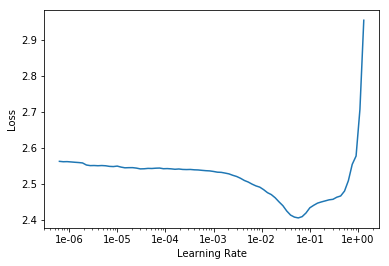

In [15]:
learn.recorder.plot()

In [114]:
# lr = 1e-2
# moms = (0.7,0.8)
# scale = (1**4)
# cycles = 20
lr = 1e-2
moms = (0.7,0.8)
scale = (1**4)
cycles = 20

In [ ]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.752018,1.455645,0.523750,00:15
1,1.391549,1.231890,0.605250,00:13
2,1.252236,1.155586,0.632250,00:13
3,1.191069,1.178496,0.628500,00:14
4,1.155482,1.144011,0.644500,00:15
5,1.167239,1.125490,0.645750,00:15
6,1.126219,1.168041,0.654250,00:15
7,1.086874,1.112375,0.663250,00:14
8,1.059638,1.121439,0.658750,00:13
9,1.046124,1.104059,0.661000,00:13


In [18]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.843524,1.245528,0.658750,00:16
1,0.824459,1.263250,0.656458,00:17
2,0.871025,1.258831,0.658333,00:16
3,0.900487,1.259418,0.656250,00:16
4,0.980166,1.237893,0.654792,00:16
5,0.980709,1.230682,0.651667,00:18
6,0.949597,1.233015,0.656250,00:16
7,0.929581,1.274798,0.641458,00:15
8,0.975930,1.271855,0.650000,00:17
9,0.879669,1.279544,0.652708,00:16


In [20]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.590527,1.090141,0.703889,00:13
1,0.603216,1.088254,0.706111,00:13
2,0.634155,1.090154,0.703611,00:12
3,0.683408,1.100006,0.702222,00:14
4,0.717303,1.066090,0.693889,00:13
5,0.775787,1.045997,0.698333,00:14
6,0.768379,1.061563,0.698889,00:14
7,0.761997,1.045723,0.703611,00:14
8,0.722673,1.084102,0.697778,00:12
9,0.704453,1.045970,0.703333,00:13


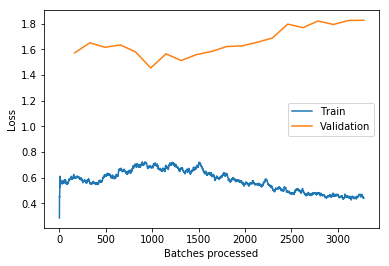

In [16]:
learn.recorder.plot_losses()

In [21]:
learn.save('2020_04_28_use_name_ff_ind')

In [340]:
learn.freeze_to(-2)

In [341]:
learn.fit_one_cycle(cycles, slice((lr/2)/scale,(lr/2)), moms=moms)
#learn.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.2,0.1))

epoch,train_loss,valid_loss,accuracy,time
0,1.302489,1.210643,0.608889,00:11
1,1.147067,1.205897,0.625079,00:11
2,1.043286,1.198088,0.634921,00:12
3,0.959284,1.212335,0.638730,00:11
4,0.937127,1.237250,0.638095,00:11


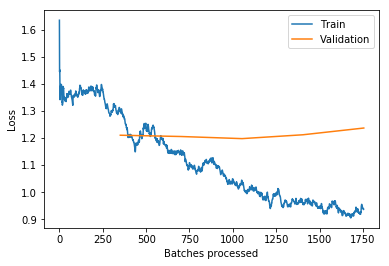

In [342]:
learn.recorder.plot_losses()

In [343]:
learn.freeze_to(-3)
#learn.fit_one_cycle(5, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.2, 0.1))
learn.fit_one_cycle(cycles, slice((lr/10)/scale,(lr/10)), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.895113,1.222485,0.637778,00:17
1,0.889085,1.226429,0.636825,00:18
2,0.881259,1.236015,0.634286,00:20
3,0.881231,1.257907,0.636190,00:17
4,0.855727,1.272891,0.634286,00:18


In [25]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(5e-5 / (2.6 ** 4), 5e-5), moms=(0.2, 0.1))

In [19]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [20]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

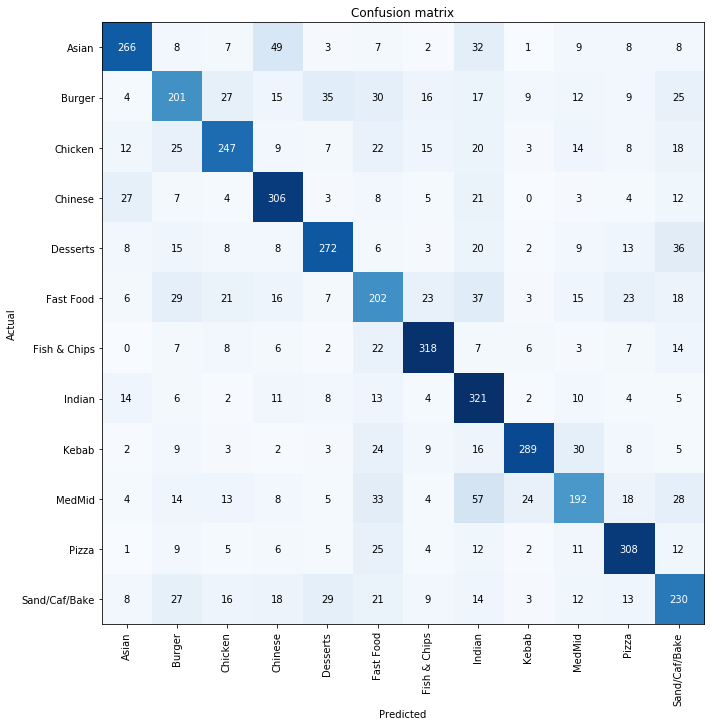

In [21]:
interp.plot_confusion_matrix(figsize=(10,10))

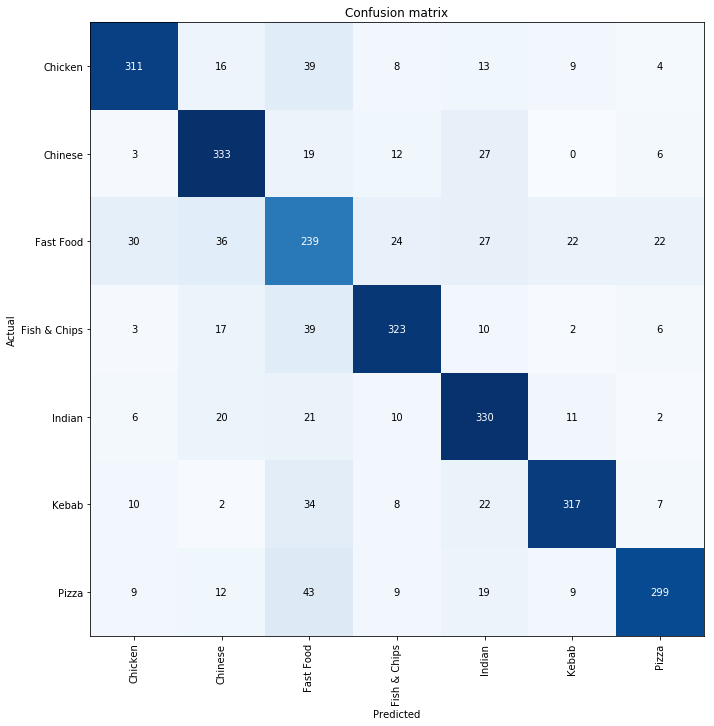

In [158]:
interp.plot_confusion_matrix(figsize=(10,10))

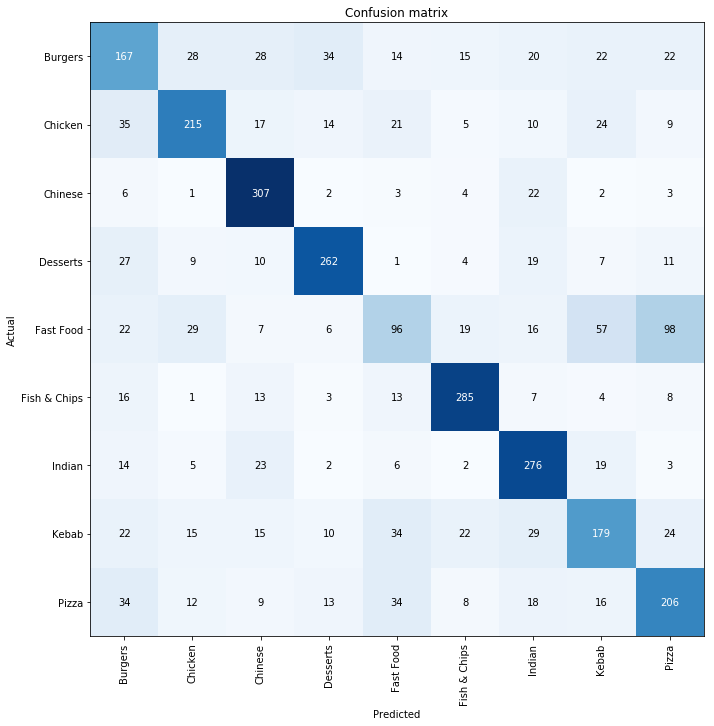

In [350]:
interp.plot_confusion_matrix(figsize=(10,10))

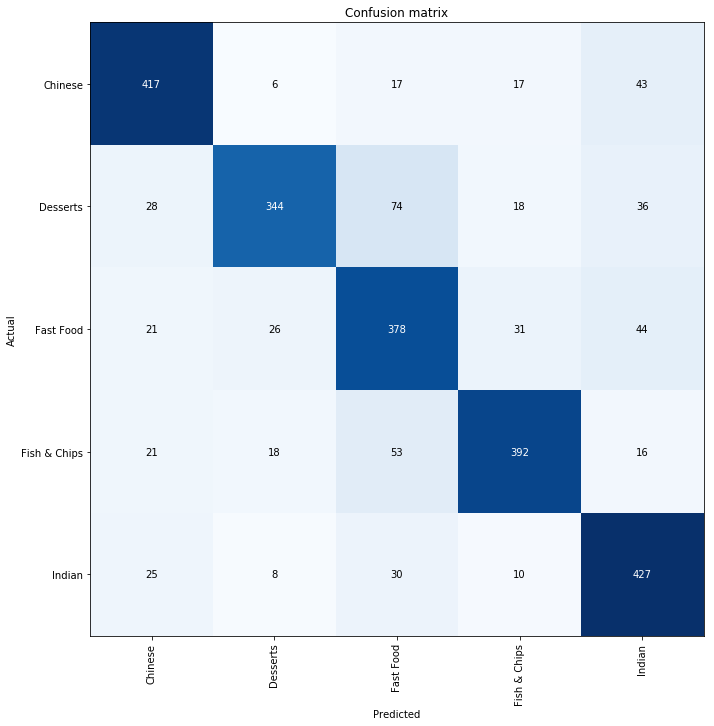

In [27]:
interp.plot_confusion_matrix(figsize=(10,10))

In [35]:
#txt_ci = TextClassificationInterpretation.from_learner(learn)
interp2 = TextClassificationInterpretation(learn, *learn.get_preds(with_loss=True, ordered=True))

In [36]:
#txt_ci.show_top_losses(20)
blah = interp2.show_top_losses(10000)


Text,Prediction,Actual,Loss,Probability
xxbos d o l c e,Fish & Chips,Desserts,13.64,0.00
xxbos m a m a s,Fast Food,Desserts,13.42,0.00
xxbos y u m m y t u m m y,Chinese,Sand/Caf/Bake,13.08,0.00
xxbos k i n g k o n e,Chinese,Desserts,13.03,0.00
xxbos m a m m a m i a ' s,Fast Food,Desserts,12.94,0.00
xxbos m o e ' s p e r i p e r i g r i l l,Fast Food,Desserts,12.85,0.00
xxbos m o n o l o s,Fast Food,Desserts,12.30,0.00
xxbos s u g a r l u m p,Desserts,Sand/Caf/Bake,12.10,0.00
xxbos n u t t y e l l a,Fast Food,Desserts,11.98,0.00
xxbos p e r i t t o ' s p e r i p e r i,Fast Food,Desserts,11.88,0.00


In [16]:
interp2.

TextClasDataBunch;

Train: LabelList (45000 items)
x: TextList
xxbos   s o u t h e r n   f r i e d   c h i c k e n     a n d     p i z z a,xxbos   m a h a r a n i   i n d i a n   c u i s i n e,xxbos   s w e e t   j a m r o c k,xxbos   s w e e t   j a m r o c k,xxbos   z a a f r a n
y: CategoryList
Fast Food,Indian,Fast Food,Fast Food,Indian
Path: .;

Valid: LabelList (3600 items)
x: TextList
xxbos   j     a n d     d   k e b a b,xxbos   v a r i e t y s   t a k e a w a y,xxbos   h o t   e x p r e s s,xxbos   f a m i l y   k e b a b     a n d     p i z z a r i a,xxbos   s u r f     a n d     t u r f
y: CategoryList
Kebab,Fast Food,Kebab,Fast Food,Fast Food
Path: .;

Test: None

In [37]:
my_top_losses = interp2.top_losses()
my_ds = interp2.data.dl('Valid').dataset
my_classes = interp2.data.valid_ds.classes
my_preds_class = interp2.pred_class
tl_val,tl_idx = my_top_losses


items = []
for idx in tl_idx:
    tx,cl = interp2.data.valid_ds[idx]
    cl = cl.data
    txt =  ' '.join([''.join(i.split()) for i in re.split(r' {2,}',tx.text)])[6:]
    tmp = [txt, f'{my_classes[my_preds_class[idx]]}', f'{my_classes[cl]}']
    items.append(tmp)
items = np.array(items)
names = ['Text', 'Prediction', 'Actual']
df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)}, columns=names)

In [167]:
df.to_csv('13_01_2020_errors.csv', index=False)

In [39]:
cm = interp2.confusion_matrix()

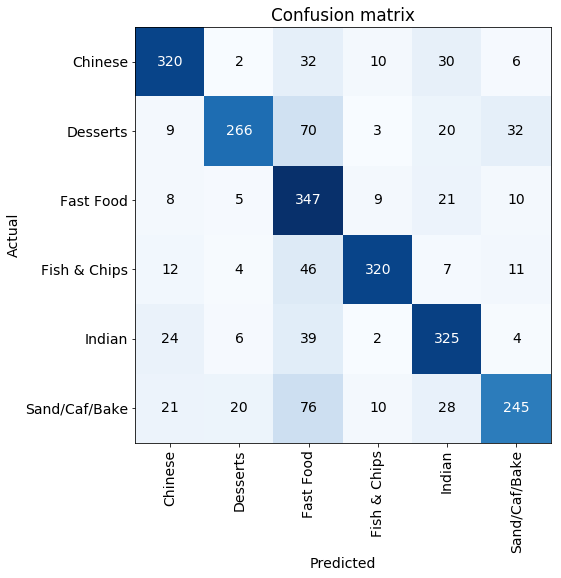

In [40]:
plt.rcParams.update({'font.size': 14})
interp2.plot_confusion_matrix(figsize=(8,8))

In [41]:
#Precision = tp / tp + fp
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [42]:
recall

array([0.8   , 0.665 , 0.8675, 0.8   , 0.8125, 0.6125])

In [43]:
precision

array([0.812183, 0.877888, 0.568852, 0.903955, 0.75406 , 0.795455])

In [44]:
precision.mean()

0.7853987769087402

In [45]:
recall.mean()

0.7595833333333334

In [23]:
learn.predict("mamoods mirch")

(Category Desserts,
 tensor(2),
 tensor([0.1397, 0.0117, 0.3502, 0.1343, 0.0332, 0.0265, 0.0559, 0.1784, 0.0701]))

In [24]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([3.3629e-07, 1.2309e-03, 3.5925e-06, 8.1342e-04, 9.9777e-01, 9.5526e-05,
         4.4523e-06, 3.9081e-05, 4.0542e-05]))

In [25]:
learn.predict("jade garden")

(Category Chinese,
 tensor(1),
 tensor([2.3990e-07, 9.9865e-01, 2.2686e-07, 2.7119e-04, 5.1614e-05, 9.7042e-04,
         1.6681e-06, 3.7176e-05, 1.4342e-05]))

In [22]:
learn.predict("jerk house")

(Category Fast Food,
 tensor(2),
 tensor([0.2168, 0.0406, 0.6402, 0.0161, 0.0781, 0.0083]))

In [23]:
learn.predict("abra kebabra")

(Category Fast Food,
 tensor(2),
 tensor([2.4363e-05, 9.9402e-07, 9.9972e-01, 2.5463e-07, 2.4918e-04, 2.0597e-07]))

In [24]:
learn.predict("mcdoner")

(Category Fast Food,
 tensor(2),
 tensor([3.2807e-03, 5.0873e-04, 9.7921e-01, 6.8078e-03, 9.9109e-03, 2.7945e-04]))

In [25]:
learn.predict("southern fried rooster")

(Category Fast Food,
 tensor(2),
 tensor([1.2324e-02, 4.9889e-04, 9.6919e-01, 4.4617e-03, 1.1890e-02, 1.6323e-03]))

In [26]:
learn.predict("luigis pizza parlour")

(Category Fast Food,
 tensor(2),
 tensor([1.8512e-04, 1.0966e-05, 9.9935e-01, 4.0324e-05, 3.8692e-04, 2.2607e-05]))

In [27]:
learn.predict("mrs boggins sandwich shop")

(Category Sand/Caf/Bake,
 tensor(5),
 tensor([1.2056e-05, 4.1230e-05, 2.2578e-04, 1.1115e-05, 3.0048e-06, 9.9971e-01]))

In [28]:
learn.predict("codfather")

(Category Fish & Chips,
 tensor(3),
 tensor([5.8303e-05, 7.2931e-06, 5.3680e-03, 9.9445e-01, 4.3550e-05, 7.2614e-05]))

In [29]:
learn.predict("top chef")

(Category Chinese,
 tensor(0),
 tensor([7.6555e-01, 1.6182e-03, 1.3469e-01, 5.7949e-03, 9.1621e-02, 7.2157e-04]))

In [30]:
learn.predict("doner cha want me")

(Category Indian,
 tensor(4),
 tensor([0.1948, 0.0015, 0.3805, 0.0207, 0.3818, 0.0207]))

In [31]:
learn.predict("kebabs r us")

(Category Fast Food,
 tensor(2),
 tensor([3.2910e-05, 6.0077e-08, 9.9990e-01, 9.7345e-08, 6.6743e-05, 2.0561e-07]))

In [32]:
learn.predict("sapna")

(Category Indian,
 tensor(4),
 tensor([2.1046e-02, 7.7136e-05, 2.6818e-01, 1.6395e-03, 7.0792e-01, 1.1401e-03]))

In [33]:
learn.predict("cocum")

(Category Indian,
 tensor(4),
 tensor([1.2241e-02, 2.1769e-04, 9.6867e-02, 6.4483e-04, 8.8962e-01, 4.1378e-04]))

In [34]:
learn.predict("uncle sam")

(Category Fast Food,
 tensor(2),
 tensor([0.0388, 0.1145, 0.4139, 0.1552, 0.2734, 0.0042]))